In [19]:
import pandas as pd
import numpy as np
import xml.etree.ElementTree as ET
import networkx as nx
import matplotlib.pyplot as plt


In [20]:
tree = ET.parse('data/drugbank_partial.xml')
root = tree.getroot()

ns = {'db': 'http://www.drugbank.ca'}

data = {
    "DrugBank ID": [],
    "Name": [],
    "Type": [],
    "Description": [],
    "State": [],
    "Indication": [],
    "Mechanism of Action": [],
    "Food Interactions": [],
}

for drug in root.findall("db:drug", ns):
    data["DrugBank ID"].append(drug.find("db:drugbank-id", ns).text)
    data["Name"].append(drug.find("db:name", ns).text)
    data["Type"].append(drug.get("type"))
    data["Description"].append(drug.find("db:description", ns).text if drug.find("db:description", ns) is not None else None)
    data["State"].append(drug.find("db:state", ns).text)
    data["Indication"].append(drug.find("db:indication", ns).text if drug.find("db:indication", ns) is not None else None)
    data["Mechanism of Action"].append(
        drug.find("db:mechanism-of-action", ns).text if drug.find("db:mechanism-of-action", ns) is not None else None
    )
    data["Food Interactions"].append(
        ";".join(food_interaction.text for food_interaction in drug.findall("db:food-interactions/db:food-interaction", ns))
    )

df = pd.DataFrame(data)
display(df.head())

,DrugBank ID,Name,Type,Description,State,Indication,Mechanism of Action,Food Interactions
0,DB00001,Lepirudin,biotech,Lepirudin is a recombinant hirudin formed by 6...,solid,Lepirudin is indicated for anticoagulation in ...,Lepirudin is a direct thrombin inhibitor used ...,Avoid herbs and supplements with anticoagulant...
1,DB00002,Cetuximab,biotech,Cetuximab is a recombinant chimeric human/mous...,liquid,Cetuximab indicated for the treatment of local...,The epidermal growth factor receptor (EGFR) is...,
2,DB00003,Dornase alfa,biotech,Dornase alfa is a biosynthetic form of human d...,liquid,Used as adjunct therapy in the treatment of cy...,Dornase alfa is a biosynthetic form of human D...,
3,DB00004,Denileukin diftitox,biotech,A recombinant DNA-derived cytotoxic protein co...,liquid,For treatment of cutaneous T-cell lymphoma,Denileukin diftitox binds to the high-affinity...,
4,DB00005,Etanercept,biotech,Dimeric fusion protein consisting of the extra...,liquid,Etanercept is indicated for the treatment of m...,There are two distinct receptors for TNF (TNFR...,


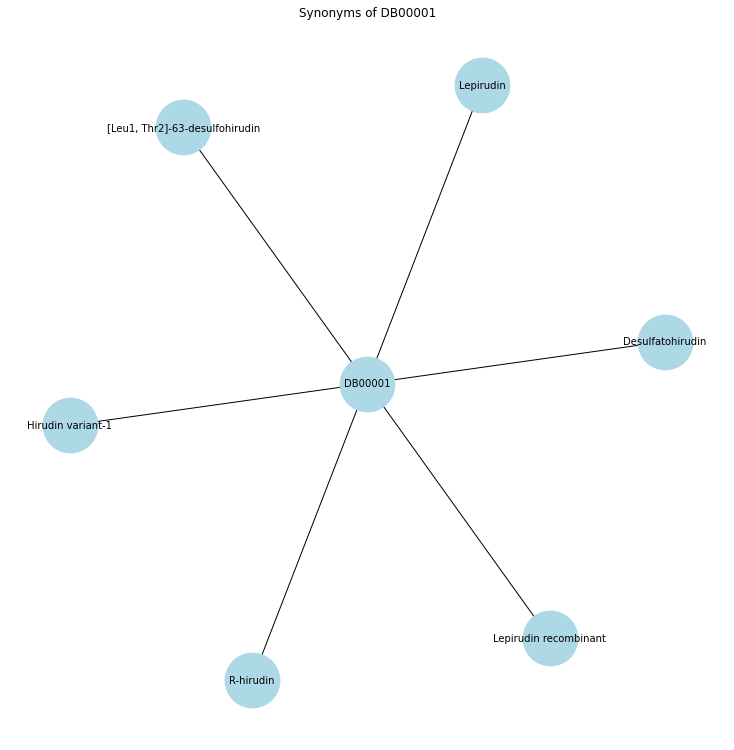

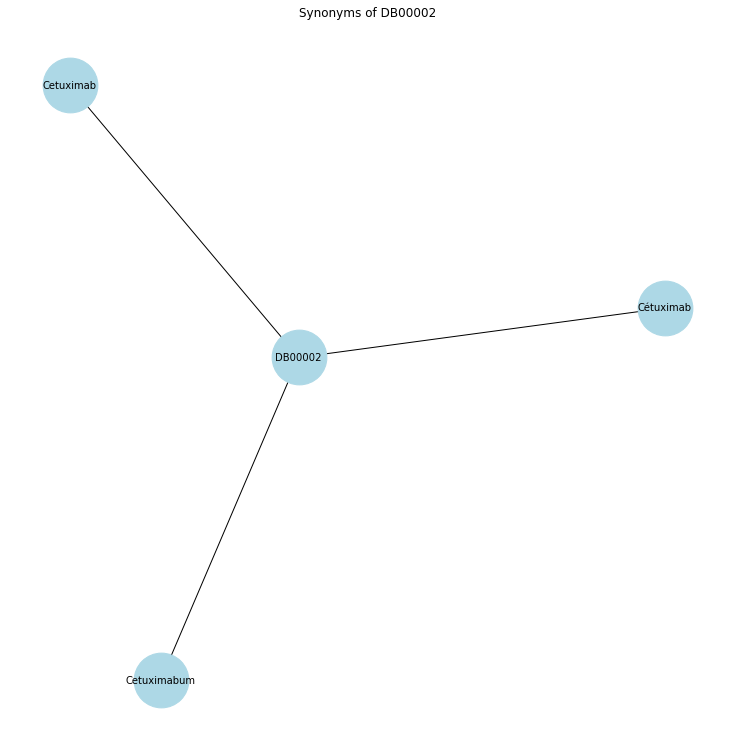

In [ ]:
def graph_of_synonyms(DBID : str):
    synonyms = []

    for drug in root.findall("db:drug", ns):
        if drug.find("db:drugbank-id", ns).text != DBID:
            continue
        for synonym in drug.findall("db:synonyms/db:synonym", ns):
            synonyms.append(synonym.text)

    G = nx.Graph()
    G.add_node(DBID, label=DBID)

    for s in synonyms:
        G.add_node(s, label=s)
        G.add_edge(DBID, s)
    
    spring_layout = nx.spring_layout(G)

    plt.figure(figsize=(6, 6))
    nx.draw(G, spring_layout, with_labels=True, node_size=1500, node_color='lightblue', font_size=10)
    plt.title(f"Synonyms of {DBID}")
    plt.show()

graph_of_synonyms("DB00001")
graph_of_synonyms("DB00002")